### I. Load library

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.metrics import Accuracy
import numpy as np
import matplotlib.pyplot as plt


### II. Load Data

2.1. Build data size

In [85]:
(X_, y_), (X_test, y_test) = mnist.load_data()
# Create Train dataset
X_train = X_[:50000, :]
print(X_train.shape)
y_train = y_[:50000]
print(y_train.shape)
# Create Val dataset
X_val = X_[50000:60000, :]
print(X_val.shape)
y_val = y_[50000:60000]
print(y_val.shape)


(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


2.2. Resize data

In [86]:
X_train.shape[0]

50000

In [87]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [88]:
X_train.shape

(50000, 28, 28, 1)

2.3 One hot encoding label Y

In [89]:
y_train[0]

5

In [90]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

In [91]:
y_train_onehot = to_categorical(y_train, 10)
y_val_onehot = to_categorical(y_val, 10)
y_test_onehot = to_categorical(y_test, 10)

In [92]:
y_train_onehot.shape

(50000, 10)

In [93]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### III. Buil Model

3.1 Define model

In [94]:
model = Sequential()

In [95]:
# Thêm lớp Convolutional với 32 kernel có size 3*3.
# Dùng hàm sigmoid làm activation, ảnh đầu vào có kích thước là 28*28
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape = (28,28,1)))

c:\Users\286ng\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
# Thêm lớp Convolutional với 32 kernel có size 3*3.
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

In [97]:
# Thêm lớp Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))


In [98]:
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

In [99]:
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

In [100]:
# Thêm Fully Connected layer với 10 nodes và dùng hàm softmax
model.add(Dense(10, activation='softmax'))

In [101]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[Accuracy])

In [102]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,810 (2.29 MB)

 Trainable params: 600,810 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
H = model.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 34ms/step - accuracy: 0.0000e+00 - loss: 0.6526 - val_accuracy: 0.0000e+00 - val_loss: 0.0643
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0594 - val_accuracy: 0.0000e+00 - val_loss: 0.0554
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0338 - val_accuracy: 0.0000e+00 - val_loss: 0.0460
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0238 - val_accuracy: 0.0000e+00 - val_loss: 0.0417
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.0000e+00 - loss: 0.0132 - val_accuracy: 0.0000e+00 - val_loss: 0.0433
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.0000e+00 - loss: 0.0111 - val_accuracy: 0.0000e+00 - val_loss: 0.0421
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 4.4144e-06 - loss: 0.0072 - val_accuracy: 0.0000e+00 - val_loss: 0.0400
Epoch 8/10
1563/1563

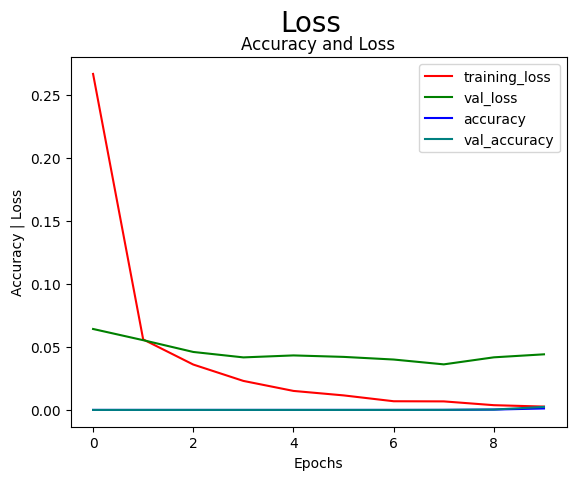

In [116]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label ='training_loss', color = 'red')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label ='val_loss', color = 'green')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label ='accuracy', color = 'blue')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label ='val_accuracy', color = 'teal')
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy | Loss")
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Giá trị dự đoán:  1


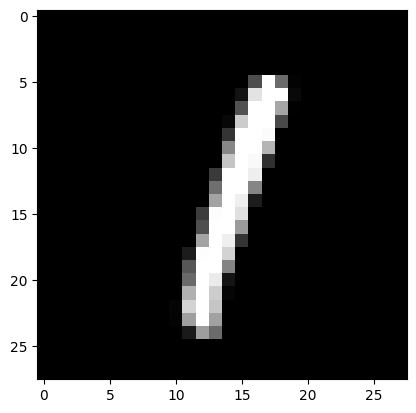

In [113]:
plt.imshow(X_test[5].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[5].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))
